In [1]:
import plotly.express as px
import pandas as pd
import numpy as np

# Create an interactive scatter plot
data = pd.read_json("../data/translations_annotated.json")
fig = px.scatter(data, x='bertscore', y='accuracy', hover_data=['english'], title='Accuracy vs BERTScore')
fig.update_layout(xaxis_title='BERTScore', yaxis_title='Accuracy')
# Define sigmoid functions
x_values = np.linspace(data['bertscore'].min(), data['bertscore'].max(), 500)

sigmoid1 = 100 / (1 + np.exp(-3.92 * (x_values - 0.47)))
sigmoid2 = 100 / (1 + np.exp(-20 * (x_values - 0.53)))

lam = 0.53
sigmoid = lam * sigmoid1 + (1 - lam) * sigmoid2

# Add sigmoid functions to the plot
fig.add_scatter(x=x_values, y=sigmoid, mode='lines', name='Best fit')
fig.update_layout(
    plot_bgcolor='white',
    xaxis=dict(showgrid=True, gridcolor='lightgrey'),
    yaxis=dict(showgrid=True, gridcolor='lightgrey'),
    legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1),
    font=dict(color='black')
)
fig.show()


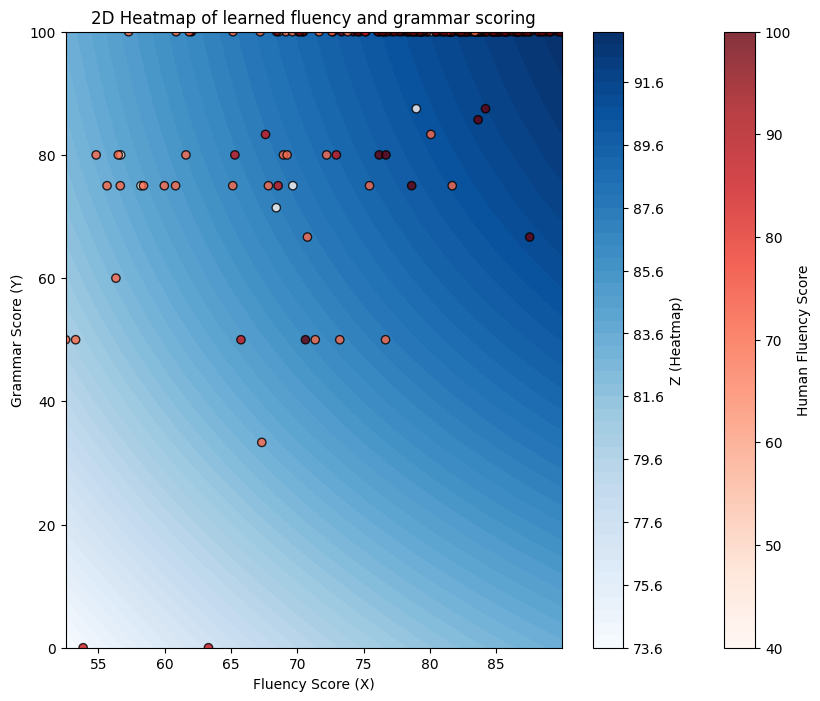

In [ ]:
import matplotlib.pyplot as plt

# Calculate z as a function of x and y
x_values = np.linspace(data['fluency_score'].min(), data['fluency_score'].max(), 500)
y_values = np.linspace(data['grammar_score'].min(), data['grammar_score'].max(), 500)

fluency_scores = data['fluency_score']
grammar_scores = data['grammar_score']
fluency = data['fluency']

X, Y = np.meshgrid(x_values, y_values)
lam = 0.8
Z = lam * (100 / (1 + np.exp(-0.03 * (X - 5.36)))) + (1 - lam) * (100 / (1 + np.exp(-0.03 * (Y - 5.07))))

# Create the heatmap
plt.figure(figsize=(10, 8))
heatmap = plt.contourf(X, Y, Z, levels=50, cmap='Blues')
sc = plt.scatter(fluency_scores, grammar_scores, c=fluency, cmap='Reds', edgecolor='black', alpha=0.8)
cbar = plt.colorbar(sc)
cbar.set_label('Human Fluency Score')

plt.colorbar(heatmap, label='Trained scoring function')
plt.xlabel('Fluency Score')
plt.ylabel('Grammar Score')
plt.title('2D Heatmap of learned fluency and grammar scoring')
plt.show()
